In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the data
df = pd.read_csv('/content/region_12 3.csv')  # Replace with your actual file name


In [ ]:
df.head()

,date,country,city,latitude,longitude,success,Type of Attack,target,weapon type,killed,wounded,hostage
0,10/21/70,Australia,Melbourne,-37.813187,144.962980,1,Bombing/Explosion,Government (Diplomatic),Explosives,0,0,0
1,11/23/71,Australia,Sydney,-33.873651,151.206890,1,Bombing/Explosion,Business,Explosives,0,0,0
2,9/17/72,Australia,Brisbane,-27.470933,153.023502,1,Bombing/Explosion,Tourists,Explosives,0,0,0
3,9/25/72,Australia,Sydney,-33.868820,151.209295,0,Assassination,Government (Diplomatic),Explosives,0,0,0
4,12-08-1972,Australia,Brisbane,-27.470933,153.023502,1,Bombing/Explosion,Business,Explosives,1,0,0


In [3]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=['float64', 'int64'])

# Display the numeric columns
numeric_data.head()

,latitude,longitude,success,killed,wounded,hostage
0,-37.813187,144.962980,1,0,0,0
1,-33.873651,151.206890,1,0,0,0
2,-27.470933,153.023502,1,0,0,0
3,-33.868820,151.209295,0,0,0,0
4,-27.470933,153.023502,1,1,0,0


In [4]:
# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix

,latitude,longitude,success,killed,wounded,hostage
latitude,1.000000,-0.057628,0.043455,0.010778,-0.057678,0.150697
longitude,-0.057628,1.000000,-0.057314,0.049348,-0.068991,0.040724
success,0.043455,-0.057314,1.000000,0.055821,0.080983,0.097071
killed,0.010778,0.049348,0.055821,1.000000,0.540784,0.061141
wounded,-0.057678,-0.068991,0.080983,0.540784,1.000000,0.033611
hostage,0.150697,0.040724,0.097071,0.061141,0.033611,1.000000


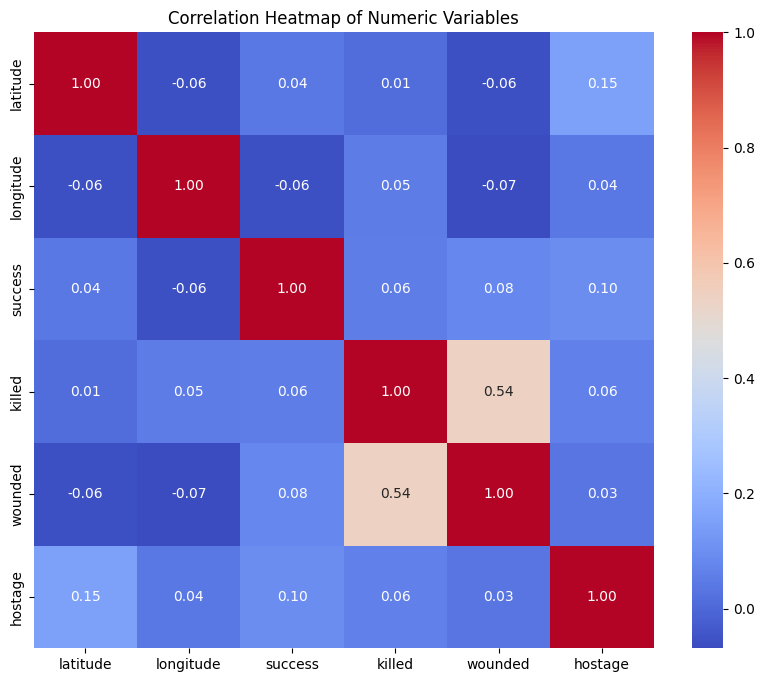

In [5]:
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

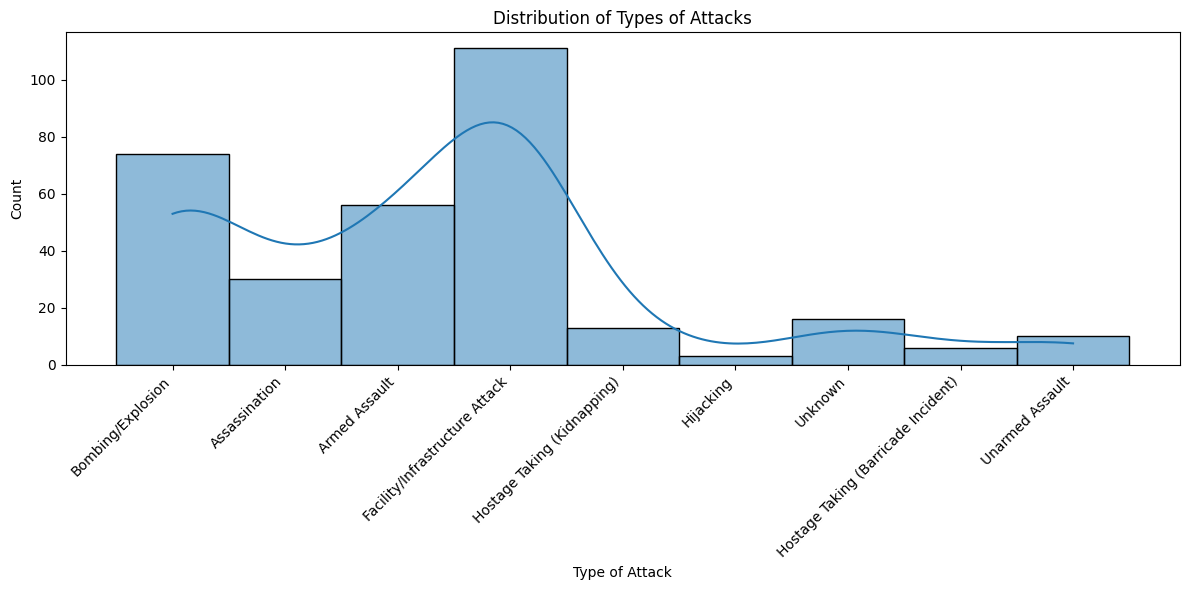

In [6]:

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# Set up the plot area with a specific size (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

# Create a histogram plot using Seaborn
# 'data=df' specifies the DataFrame being used
# 'x='Type of Attack'' sets the column to be plotted on the x-axis
# 'kde=True' adds a kernel density estimate curve to the histogram
sns.histplot(data=df, x='Type of Attack', kde=True)

# Set the title of the plot
plt.title('Distribution of Types of Attacks')

# Rotate x-axis labels by 45 degrees and align them to the right
# This helps prevent overlapping labels if they are long
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()

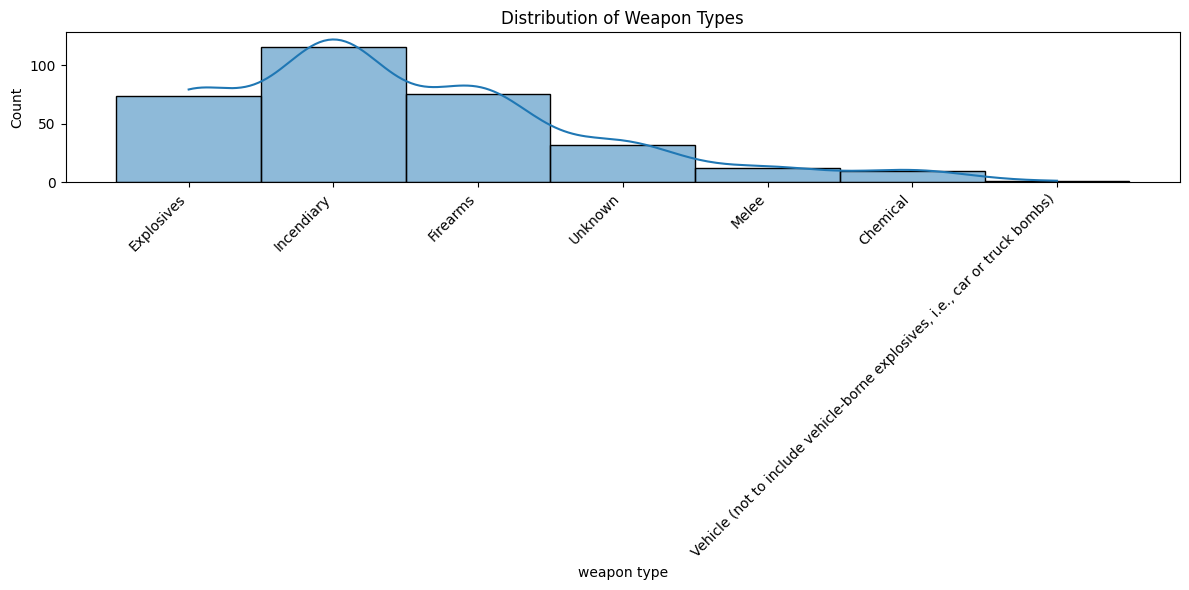

In [7]:

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# Create a new figure with specified dimensions (12 inches wide, 6 inches tall)
plt.figure(figsize=(12, 6))

# Generate a histogram using Seaborn
# 'data=df' specifies the DataFrame being used
# 'x='weapon type'' sets the column to be plotted on the x-axis
# 'kde=True' adds a kernel density estimate curve to the histogram
sns.histplot(data=df, x='weapon type', kde=True)

# Set the title of the plot
plt.title('Distribution of Weapon Types')

# Rotate x-axis labels by 45 degrees and align them to the right
# This improves readability for longer weapon type names
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent cutting off labels or title
plt.tight_layout()

# Display the plot
plt.show()

In [8]:

# import folium
# from folium.plugins import HeatMap
# import pandas as pd
from IPython.display import display

# Create a map centered on the mean latitude and longitude of all incidents
# This ensures that the map is centered on the area with the most data points
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)

# Create a list of [latitude, longitude, killed] for each incident
# This data will be used to create the heatmap
heat_data = [[row['latitude'], row['longitude'], row['killed']] for index, row in df.iterrows()]

# Add the heatmap layer to the map
# The intensity of each point on the heatmap is determined by the 'killed' value
HeatMap(heat_data).add_to(m)

# Save the map as an HTML file
# This allows the map to be viewed in a web browser outside of the notebook
m.save('heatmap_killed.html')
print("Heatmap saved as 'heatmap_killed.html'")

# Create a new map instance with the same center and zoom level
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=4)

# Add the heatmap layer to the new map instance
HeatMap(heat_data).add_to(m)

# Display the map directly in the Jupyter notebook
display(m)

Heatmap saved as 'heatmap_killed.html'


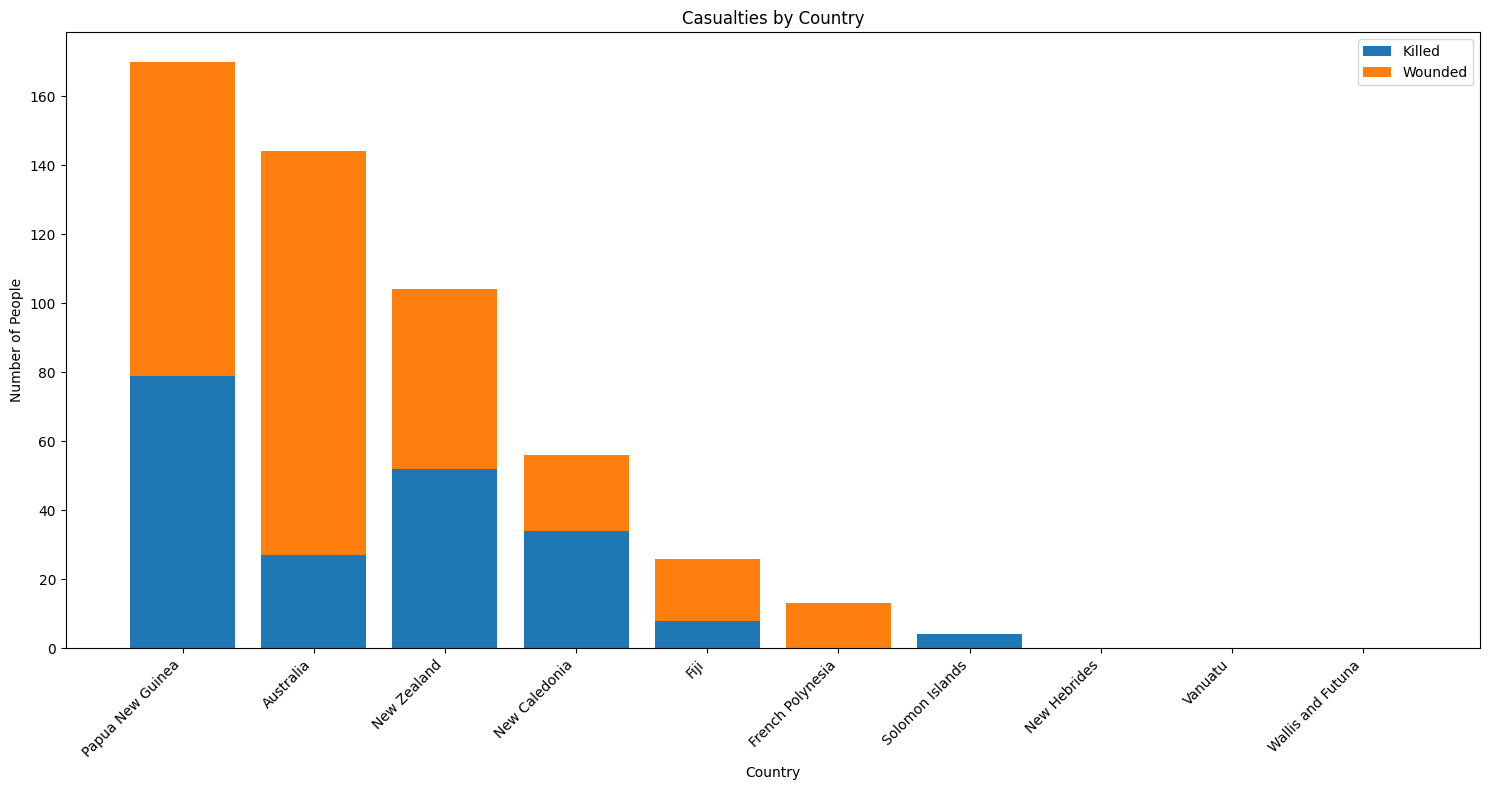

In [9]:
import pandas as pd
import matplotlib.pyplot as plt



# Group the data by country and sum the 'killed' and 'wounded' columns
# This aggregates the casualties for each country
grouped_data = df.groupby('country')[['killed', 'wounded']].sum().reset_index()

# Calculate total casualties and sort countries in descending order
grouped_data['total'] = grouped_data['killed'] + grouped_data['wounded']
grouped_data = grouped_data.sort_values('total', ascending=False)

# Select top N countries for visualization
# This helps focus on the most affected countries and improves readability
N = 15  # Number of top countries to display
top_countries = grouped_data.head(N)

# Create the stacked bar chart
plt.figure(figsize=(15, 8))  # Set the figure size for better visibility

# Create the first bar for 'killed' casualties
plt.bar(top_countries['country'], top_countries['killed'], label='Killed')

# Create the second bar for 'wounded' casualties, stacked on top of 'killed'
plt.bar(top_countries['country'], top_countries['wounded'],
        bottom=top_countries['killed'], label='Wounded')

# Set the title and labels
plt.title('Casualties by Country')
plt.xlabel('Country')
plt.ylabel('Number of People')

# Add a legend to distinguish between 'Killed' and 'Wounded'
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent cutting off labels
plt.tight_layout()

# Display the plot
plt.show()